In [1]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
name_to_url = {
    'dwayne_johnson': 'https://www.imdb.com/name/nm0425005/',
    'chris_hemsworth': 'https://www.imdb.com/name/nm1165110/',
    'akshay_kumar': 'https://www.imdb.com/name/nm0474774/',
    'jackie_chan': 'https://www.imdb.com/name/nm0000329/',
    'bradley_cooper': 'https://www.imdb.com/name/nm0177896/',
    'adam_sandler': 'https://www.imdb.com/name/nm0001191/',
    'scarlett_johansson': 'https://www.imdb.com/name/nm0424060/',
    'sofia_vergara': 'https://www.imdb.com/name/nm0005527/',
    'chris_evans': 'https://www.imdb.com/name/nm0262635/',
}

In [3]:
url_to_name = {}
for k, v in name_to_url.items():
    url_to_name[v] = k

url_to_name

{'https://www.imdb.com/name/nm0425005/': 'dwayne_johnson',
 'https://www.imdb.com/name/nm1165110/': 'chris_hemsworth',
 'https://www.imdb.com/name/nm0474774/': 'akshay_kumar',
 'https://www.imdb.com/name/nm0000329/': 'jackie_chan',
 'https://www.imdb.com/name/nm0177896/': 'bradley_cooper',
 'https://www.imdb.com/name/nm0001191/': 'adam_sandler',
 'https://www.imdb.com/name/nm0424060/': 'scarlett_johansson',
 'https://www.imdb.com/name/nm0005527/': 'sofia_vergara',
 'https://www.imdb.com/name/nm0262635/': 'chris_evans'}

In [4]:
url_tuple_to_dist = {
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0424060/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0005527/'): 1,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0424060/'): 1,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0424060/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0424060/'): 1,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0177896/'): 1,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0262635/'): 1,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0424060/'): 1,
    ('https://www.imdb.com/name/nm0425005/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0425005/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0424060/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0424060/'): 2,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm1165110/'): 2,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0177896/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0005527/'): 2,
    ('https://www.imdb.com/name/nm0005527/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0001191/'): 2,
    ('https://www.imdb.com/name/nm0001191/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm0474774/', 'https://www.imdb.com/name/nm0000329/'): 2,
    ('https://www.imdb.com/name/nm0000329/', 'https://www.imdb.com/name/nm0474774/'): 2,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0262635/'): 1,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm1165110/'): 1,
    ('https://www.imdb.com/name/nm1165110/', 'https://www.imdb.com/name/nm0424060/'): 1,
    ('https://www.imdb.com/name/nm0424060/', 'https://www.imdb.com/name/nm1165110/'): 1,
    ('https://www.imdb.com/name/nm0177896/', 'https://www.imdb.com/name/nm0262635/'): 2,
    ('https://www.imdb.com/name/nm0262635/', 'https://www.imdb.com/name/nm0177896/'): 2
}

In [5]:
actors_dist = []
actors = set()
actor_pair_set = set()
for k, v in url_tuple_to_dist.items():
    url_s, url_e = k
    actor_s = url_to_name[url_s]
    actor_e = url_to_name[url_e]
    if (actor_s, actor_e) in actor_pair_set or (actor_e, actor_s) in actor_pair_set:
        continue

    actors_dist.append((actor_s, actor_e, v))
    actor_pair_set.add((actor_s, actor_e))
    actors.add(actor_s)
    actors.add(actor_e)

actors = list(actors)
len(actors_dist) == len(name_to_url) * (len(name_to_url) - 1)/2

True

In [58]:
actors

['dwayne_johnson',
 'chris_evans',
 'adam_sandler',
 'chris_hemsworth',
 'jackie_chan',
 'bradley_cooper',
 'akshay_kumar',
 'sofia_vergara',
 'scarlett_johansson']

In [66]:
color_map = {
    1: 'g',
    2: 'y',
    3: 'r',
}

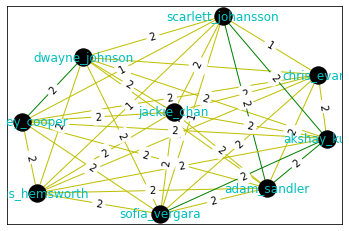

In [69]:
G = nx.Graph()
for a in actors:
    G.add_node(a, label=a, color='w')

color_arr = []
for s, e, w in actors_dist:
    color = color_map[w]
    color_arr.append(color)
    G.add_edge(s, e, weight=w, color=color)

node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_colors = nx.get_edge_attributes(G, 'color')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='k')
nx.draw_networkx_edges(G, pos, edge_color=color_arr)

nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='c')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

[('jackie_chan', 'bradley_cooper', 2),
 ('jackie_chan', 'scarlett_johansson', 2),
 ('dwayne_johnson', 'adam_sandler', 2),
 ('scarlett_johansson', 'sofia_vergara', 1),
 ('akshay_kumar', 'bradley_cooper', 2),
 ('akshay_kumar', 'sofia_vergara', 2),
 ('dwayne_johnson', 'akshay_kumar', 2),
 ('dwayne_johnson', 'chris_hemsworth', 2),
 ('chris_hemsworth', 'akshay_kumar', 2),
 ('dwayne_johnson', 'bradley_cooper', 2),
 ('chris_hemsworth', 'bradley_cooper', 2),
 ('chris_hemsworth', 'jackie_chan', 2),
 ('akshay_kumar', 'chris_evans', 2),
 ('dwayne_johnson', 'scarlett_johansson', 2),
 ('adam_sandler', 'chris_evans', 2),
 ('bradley_cooper', 'scarlett_johansson', 1),
 ('dwayne_johnson', 'chris_evans', 2),
 ('sofia_vergara', 'chris_evans', 2),
 ('jackie_chan', 'sofia_vergara', 2),
 ('dwayne_johnson', 'sofia_vergara', 2),
 ('scarlett_johansson', 'chris_evans', 1),
 ('dwayne_johnson', 'jackie_chan', 2),
 ('adam_sandler', 'scarlett_johansson', 2),
 ('akshay_kumar', 'scarlett_johansson', 2),
 ('chris_hems

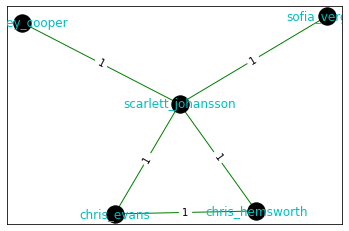

In [75]:
a1_dist = [(s, e, w) for s, e, w in actors_dist if w == 1]
a1 = set()
for s, e, _ in a1_dist:
    a1.add(s)
    a1.add(e)

G = nx.Graph()
for a in a1:
    G.add_node(a, label=a, color='w')

color_arr = []
for s, e, w in a1_dist:
    color = color_map[w]
    color_arr.append(color)
    G.add_edge(s, e, weight=w, color=color)

node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_colors = nx.get_edge_attributes(G, 'color')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='k')
nx.draw_networkx_edges(G, pos, edge_color=color_arr)

nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='c')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()

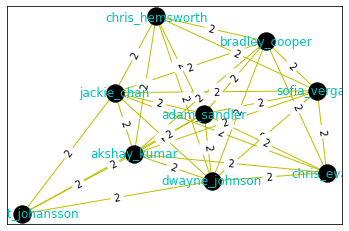

In [76]:
a1_dist = [(s, e, w) for s, e, w in actors_dist if w == 2]
a1 = set()
for s, e, _ in a1_dist:
    a1.add(s)
    a1.add(e)

G = nx.Graph()
for a in a1:
    G.add_node(a, label=a, color='w')

color_arr = []
for s, e, w in a1_dist:
    color = color_map[w]
    color_arr.append(color)
    G.add_edge(s, e, weight=w, color=color)

node_labels = nx.get_node_attributes(G, 'label')
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_colors = nx.get_edge_attributes(G, 'color')

pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, node_color='k')
nx.draw_networkx_edges(G, pos, edge_color=color_arr)

nx.draw_networkx_labels(G, pos, labels=node_labels, font_color='c')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.show()